## Tugas Besar - Pemodelan dan Optimasi : Klasifikasi Linear dan SVM

Muhammad Kiko Aulia Reiki 
2301222050

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

### Dataset

In [2]:
df = pd.read_csv('Data/DataClassification.txt', delimiter='\t')
pd.set_option('display.max_rows', 10)
df

,x,Y,LABEL
0,1.0000,399.6550,1
1,5.8293,428.5600,1
2,10.6585,266.0618,1
3,15.4878,376.9293,1
4,20.3171,383.6759,1
...,...,...,...
37,80.6829,145.3422,2
38,85.5122,189.6681,2
39,90.3415,113.8343,2
40,95.1707,182.9472,2


In [3]:
df_label1 = df.loc[df['LABEL'] == 1]
df_label2 = df.loc[df['LABEL'] == 2]

### Data Plotting

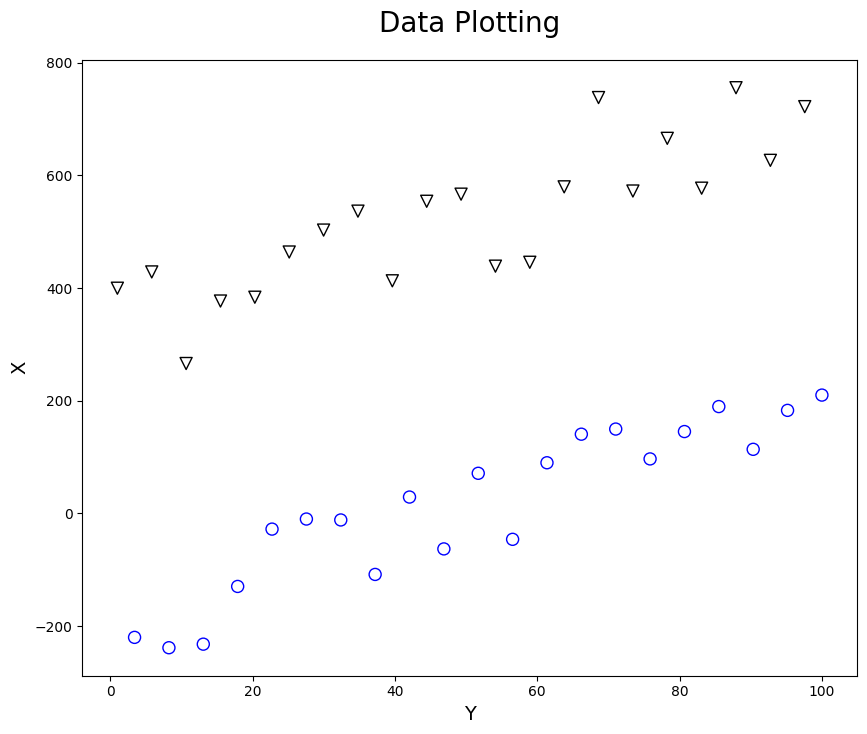

In [4]:
color = ['black', 'blue']
plt_1 = plt.figure(figsize=(10, 8))
plt.scatter(df_label1['x'], df_label1['Y'], marker='v', facecolors='none', edgecolors='black', s=75)
plt.scatter(df_label2['x'], df_label2['Y'], marker='o', facecolors='none', edgecolors='blue', s=75)

plt.title('Data Plotting', size=20, pad=20)
plt.xlabel('Y', size=14)
plt.ylabel('X', size=14)
plt.show()

### Data Splitting

In [5]:
from sklearn.model_selection import train_test_split
X = df[['x', 'Y']].to_numpy()
y = df[['LABEL']].to_numpy()
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3, random_state=42)

### Klasifikasi dan Analisis Hasil

#### Klasifikasi Linear

The Ridge regressor has a classifier variant: RidgeClassifier. This classifier first converts binary targets to {-1, 1} and then treats the problem as a regression task, optimizing the same objective as above. The predicted class corresponds to the sign of the regressor’s prediction. For multiclass classification, the problem is treated as multi-output regression, and the predicted class corresponds to the output with the highest value.

References : https://scikit-learn.org/stable/modules/linear_model.html

In [6]:
from sklearn import linear_model
model = linear_model.RidgeClassifier()
linclf = model.fit(X_train, y_train)
preds = model.predict(X_test)

preds

array([2, 1, 1, 2, 1, 2, 1, 2, 2, 1, 2, 1, 1])

#### Analisis Hasil Klasifikasi Linear

In [7]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
print("Accuracy: ", accuracy_score(y_test, preds))
print("Confusion Matrix: \n", confusion_matrix(y_test, preds))

Accuracy:  1.0
Confusion Matrix: 
 [[7 0]
 [0 6]]


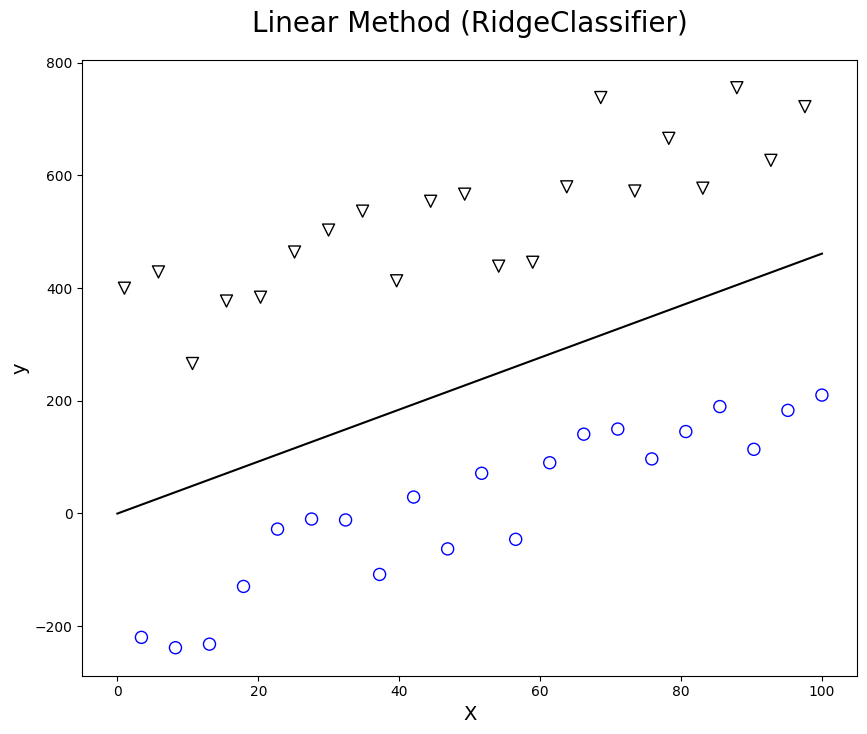

In [8]:
plt_2 = plt.figure(figsize=(10, 8))
plt.scatter(df_label1['x'], df_label1['Y'], marker='v', facecolors='none', edgecolors='black', s=75)
plt.scatter(df_label2['x'], df_label2['Y'], marker='o', facecolors='none', edgecolors='blue', s=75)

w = linclf.coef_[0]
a = -w[0] / w[1]
xp = np.linspace(0, 100)
yp = a * xp - (linclf.intercept_)

plt.plot(xp, yp, 'k-')
plt.title('Linear Method (RidgeClassifier)', size=20, pad=20)
plt.xlabel('X', size=14)
plt.ylabel('y', size=14)
plt.show()

#### Klasifikasi Support Vector

In [9]:
from sklearn.svm import SVC
model = SVC(kernel='linear')
svmclf = model.fit(X_train, y_train)
preds2 = model.predict(X_test)

preds2

array([2, 1, 1, 2, 1, 2, 1, 2, 2, 1, 2, 1, 1])

#### Analisis Hasil Klasifikasi Support Vector

In [10]:
print("Accuracy: ", accuracy_score(y_test, preds2))
print("Confusion Matrix: \n", confusion_matrix(y_test, preds2))

Accuracy:  1.0
Confusion Matrix: 
 [[7 0]
 [0 6]]


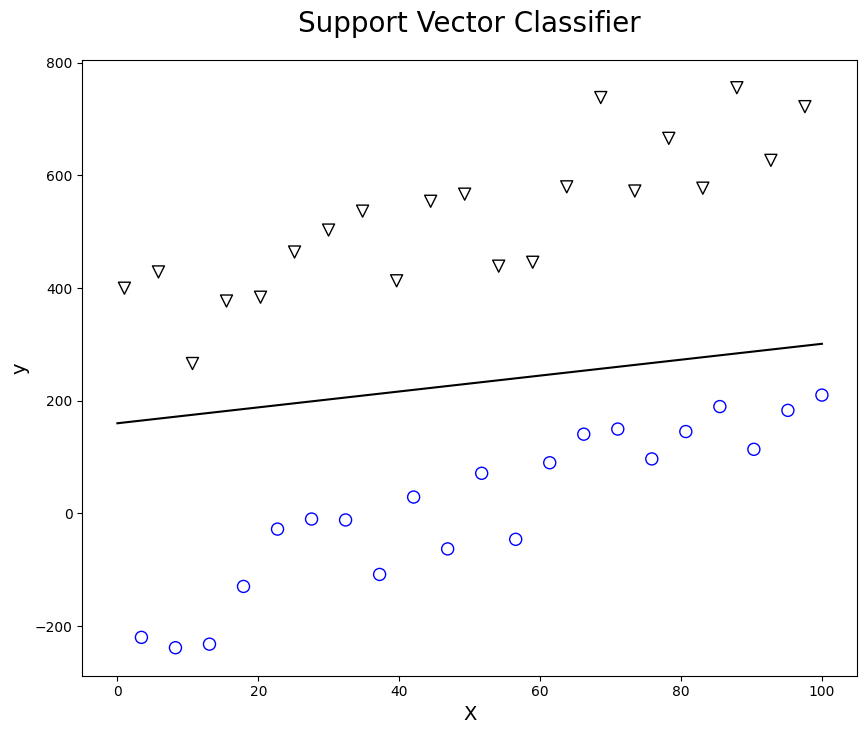

In [46]:
plt_3 = plt.figure(figsize=(10, 8))
plt.scatter(df_label1['x'], df_label1['Y'], marker='v', facecolors='none', edgecolors='black', s=75)
plt.scatter(df_label2['x'], df_label2['Y'], marker='o', facecolors='none', edgecolors='blue', s=75)

w = svmclf.coef_[0]
b = svmclf.intercept_[0]
a = -w[0] / w[1]
xp = np.linspace(0, 100)
yp = a * xp - b / w[1]

plt.plot(xp, yp, 'k-')
plt.title('Support Vector Classifier', size=20, pad=20)
plt.xlabel('X', size=14)
plt.ylabel('y', size=14)
plt.show()

#### Klasifikasi Genetic Algorithm

In [45]:
import pygad
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Define the fitness function
def fitness_func(solution, solution_idx, ga_instance):
    # Decode the solution
    weights = solution[:2]
    bias = solution[2]

    # Calculate the predicted labels for the training set
    net_input_train = np.dot(X_train, weights) + bias
    predicted_labels_train = np.where(net_input_train >= 0, 1, 2)

    # Calculate the accuracy for the training set
    accuracy_train = np.sum(predicted_labels_train == y_train) / len(y_train)

    # Calculate the fitness value
    fitness = accuracy_train + 1e-10  # Add a small constant to avoid division by zero

    return fitness

# Create an instance of the Genetic Algorithm
ga_instance = pygad.GA(num_generations=50, num_parents_mating=10, fitness_func=fitness_func,
                       sol_per_pop=20, num_genes=3)

# Run the Genetic Algorithm
ga_instance.run()

# Get the best solution and its fitness value
best_solution, best_solution_fitness = ga_instance.best_solution(), ga_instance.best_solution_fitness

# Calculate the predicted labels for the testing set using the best solution
weights = best_solution[:2]
bias = best_solution[2]
net_input_test = np.dot(X_test, weights) + bias
predicted_labels_test = np.where(net_input_test >= 0, 1, 2)

# Calculate accuracy, RMSE, and MSE
accuracy = np.sum(predicted_labels_test == y_test) / len(y_test)
rmse = np.sqrt(mean_squared_error(y_test, predicted_labels_test))
mse = mean_squared_error(y_test, predicted_labels_test)

# Print the results
print("Best Solution:", best_solution)
print("Best Solution Fitness:", best_solution_fitness)
print("Accuracy:", accuracy)
print("RMSE:", rmse)
print("MSE:", mse)

TypeError: 'GA' object is not subscriptable